<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transition-Dynamics-in-CSIM" data-toc-modified-id="Transition-Dynamics-in-CSIM-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transition Dynamics in CSIM</a></span><ul class="toc-item"><li><span><a href="#Import-results-from-Step-1" data-toc-modified-id="Import-results-from-Step-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import results from Step 1</a></span></li><li><span><a href="#How-to-read-and-extract-the-results" data-toc-modified-id="How-to-read-and-extract-the-results-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How to read and extract the results</a></span></li><li><span><a href="#Relative-price-transition" data-toc-modified-id="Relative-price-transition-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Relative price transition</a></span></li><li><span><a href="#Mean-real-money-balance" data-toc-modified-id="Mean-real-money-balance-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Mean real money balance</a></span></li><li><span><a href="#Welfare" data-toc-modified-id="Welfare-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Welfare</a></span><ul class="toc-item"><li><span><a href="#Initial-SME" data-toc-modified-id="Initial-SME-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Initial SME</a></span></li><li><span><a href="#Terminal-welfare" data-toc-modified-id="Terminal-welfare-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Terminal welfare</a></span></li><li><span><a href="#Transitional-welfare" data-toc-modified-id="Transitional-welfare-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Transitional welfare</a></span></li></ul></li></ul></li></ul></div>

# Transition Dynamics in CSIM

Prepared by [Timothy Kam](https://phantomachine.github.io/)

In [89]:
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from cssegmod import basemod as model   # Model class

**Purpose**: Plot deterministic transition dynamics of variables in CSIM.

**How-to STEPS**:

1. Make sure you run ``transition.py`` for the first time to set and save the *initial* and *terminal* **stationary monetary equilibria (SME)**. 

    * Ensure that the flag ``LOAD_OLD`` is set to ``False`` if you are running a new set of experiments. Otherwise, set it as ``True``.

    * This step can be done in parallel by executing in a terminal either of these commands:

        ``mpirun -n 24 python transition.py``
      
      or, for Windows users:

        ``mpiexec -n 24 python transition.py``

    * (The default maximum number of parallel compute cores ``n`` is set to $24$.)

2. After completing step 1, then run ``transition.py`` again to compute the transition paths. 

    * Now, ensure that the flag ``LOAD_OLD`` is set to ``True``.
    
    * This step is done serially as the problem is not parallelized here.

    * It may take a long time.

3. Finally, run this notebook below.


# Import results from Step 1 (Static SME)

In [90]:
# Initial SME
results_init = np.load('dynamics/results_init.npy', 
                       encoding='latin1', 
                       allow_pickle=True).item()

# Final SME
results_term = np.load('dynamics/results_term.npy', 
                       encoding='latin1', 
                       allow_pickle=True).item()

In [91]:
# Initial and terminal SME real wage
ω_init = results_init['distro']['omega']
ω_term = results_term['distro']['omega']
print("Initial real wage =%6.4g" %(ω_init))
print("Terminal real wage =%6.4g" %(ω_term))

Initial real wage = 1.963
Terminal real wage = 1.996


In the model, $\omega_{t}$ is the real wage rate and $1/\omega_{t}$ would be the market-clearing aggregate real money balance.

# Import results from Step 2 (Transitional Dynamics)

In [92]:
# Transition
results_tran = np.load('dynamics/results_transition.npy', 
                       encoding='latin1', 
                       allow_pickle=True).item()

In [93]:
# Show number of iterations required for convergence
iter_count = len(results_tran['price'])
print("Number of path-guess iteration(s): %i" %(iter_count))

Number of path-guess iteration(s): 3


Get the last iteration of the price path:

In [94]:
# Converged transition path (last iteration over path guess is "-1")
iter_path = -1
ω_path = results_tran['price'][iter_path]

# x-axis: time
date = np.arange(ω_path.size)

Length of transition period:

In [95]:
T = len(date)

Convergence error factor is:

In [96]:
factor_ϵ = 1.0 + (ω_path[-1] - ω_term)/ω_term
print("Convergence error factor: %6.6f" %(factor_ϵ))
print("Convergence (percentage) error: %6.2f percent" %((factor_ϵ-1.0)*100.0))

Convergence error factor: 1.002339
Convergence (percentage) error:   0.23 percent


# Transition: extract and read results

Recall the available keys in the dictionary ``results_tran``:

In [97]:
results_tran.keys()

dict_keys(['price', 'value', 'policy', 'distro'])

Extract date-dependent policy functions from ``results_tran``. Example for some date $t$:

In [98]:
policies = results_tran['policy'][0]

In [99]:
len(policies)

301

In [100]:
t = 200
policies[t].keys()

dict_keys(['ystar', 'lstar', 'bstar', 'xstar', 'qstar'])

In [101]:

policies[t]['bstar']

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72864359, 0.89423187, 0.93055502, 0.9504198 , 0.95738547,
       0.95738547, 0.95738547, 0.95738547, 0.95738547, 0.95738547,
       0.95738547, 0.95738547, 0.95738547, 0.95738547, 0.95738547,
       0.95738547, 0.95738547, 0.95738547, 0.95738547, 0.95738547,
       0.95738547, 0.95738547, 0.95738547, 0.95738547, 0.95738547,
       0.95738547, 0.95738547])

In [102]:
# Get a dummy of the model class
mod = model(  UbarCM=1.0, A = 1.0, SIGMA_CM = 2.0, SIGMA_DM = 1.01, 
                m_gridsize_ltk = 24, m_gridsize_gtk = 48)

In [103]:
# Set of sample dates along transition - for plotting
T_subset = [0, 20, 50, 150, 200, 250, 298, 299, 300]
# Domain of policy functions
x = mod.m_grid

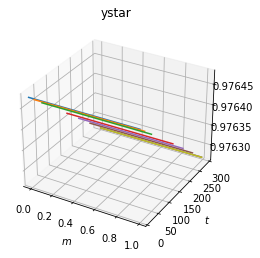

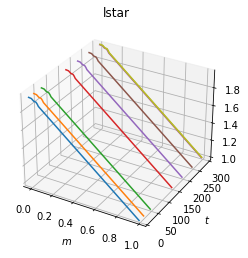

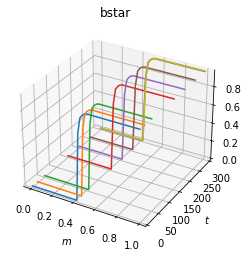

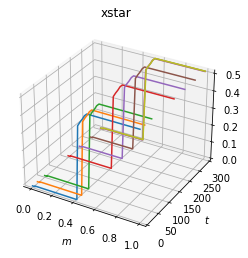

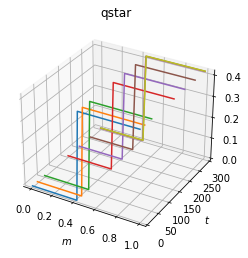

In [104]:
for idx_key, key in enumerate(policies[0].keys()):
    # New figure
    ax = plt.figure().add_subplot(projection='3d')   
    # Function at date t
    for idx_t, t in enumerate(T_subset):
        y = policies[t][key]
        ax.plot(x, y, zs=t, zdir='y')
    plt.ylim([0, T])
    plt.xlabel(r'$m$')
    plt.ylabel(r'$t$')
    plt.title(key)
    plt.show()

Remarks:

* The policy function graphs along transition look very similar.

* They are different only to a second decimal place so graphically, it is difficult to visualize.

## Relative price transition

In [105]:
def plot2d(x, y, xlabel='', ylabel='', yrotate=0, LineMarkStyle=''):
    """Plot 2D figure"""
    plt.yscale('symlog')
    plt.plot(x, y, LineMarkStyle)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, rotation=yrotate)

We add on additional time periods for post-convergence to the new SME. This is merely cosmetic so the transition path diagrams below are more pleasing on the eye!

In [122]:
date_longrun = np.arange(T, T+200, 1)
x_date = np.append(date, date_longrun)
y_path = np.append(ω_path, np.tile(ω_path[-1], (1, len(date_longrun))))

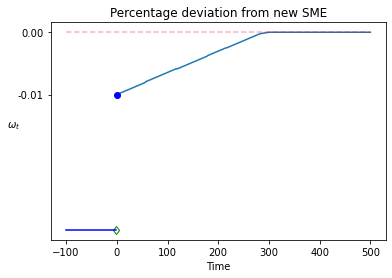

In [138]:
plt.figure()
# The transition path of ω(t)
plot2d(x_date, y_path, 'Time', r'$\omega_{t}$', 0, '-')
# Initial SME
plt.plot(-1.0, ω_init, marker='d',
            markerfacecolor='none', 
            markeredgecolor='g')
x_init = np.arange(-100, 0)
y_init = ω_init*np.ones(x_init.size) 
plt.plot(x_init, y_init, '-b')
# Jump after new \tau policy changed
plt.plot(x_date[0], ω_path[0], 'ob')
# Terminal SME
ω_term_ϵ = factor_ϵ*ω_term
# plt.plot(date[-1], ω_term_ϵ, 'sr')
# Visual reference line for new SME (normalized to "zero")
x_newsme = np.concatenate((x_init, x_date), axis=0)
y_newsme = ω_term_ϵ*(np.ones(x_newsme.size))
plt.plot(x_newsme, y_newsme, '--r', alpha=0.3)
# Change y-axis labels into %-deviation scale
newYlabel = [f'{np.log(ω_path.min()/ω_term_ϵ):.2f}', 
             f'{np.log(ω_path.max()/ω_term_ϵ):.2f}']
plt.yticks([ω_path.min(), ω_path.max()], newYlabel)
plt.title('Percentage deviation from new SME')
plt.show()

* The green diamond is the initial SME's aggregate real wage (in units of labor).

* The red square (and dashed, red line) is the terminal SME's aggregate real wage.

* The blue dotted path is the transition of real wage given the permanent increase in inflation from 0% to 10% per annum. 

## Mean real money balance

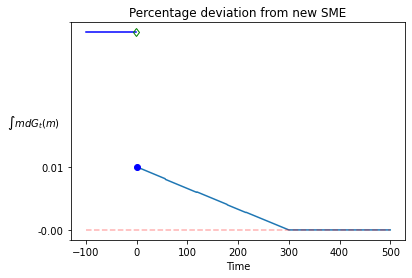

In [140]:
plt.figure()
# Transition path
plot2d(x_date, 1/y_path, 'Time', r'$\int m dG_{t}(m)$', 0, '-')
# Initial SME
x_init = np.arange(-100., -1.0)
y_init = (1./ω_init)*np.ones(x_init.size) 
plt.plot(x_init, y_init, '-b')
plt.plot(-1.0, 1/ω_init, marker='d',
            markerfacecolor='none', 
            markeredgecolor='g')
# Jump after new \tau policy changed
plt.plot(x_date[0], 1/ω_path[0], 'ob')
ω_term_ϵ = factor_ϵ*ω_term
# plt.plot(date[-1], 1/ω_term_ϵ, 'sr')
# plt.plot(date, (1/ω_term_ϵ)*np.ones(date.size), '--r', alpha=0.3)
x_newsme = np.concatenate((x_init, x_date), axis=0)
y_newsme = (1/ω_term_ϵ)*(np.ones(x_newsme.size))
plt.plot(x_newsme, y_newsme, '--r', alpha=0.3)
# Change y-axis labels into %-deviation scale
newYlabel = [f'{-np.log(ω_path.min()/ω_term_ϵ):.2f}', f'{-np.log(ω_path.max()/ω_term_ϵ):.2f}']
plt.yticks([1/ω_path.min(), 1/ω_path.max()], newYlabel)
plt.title('Percentage deviation from new SME')
plt.show()

* The green diamond is the initial SME's aggregate real balances (in units of labor).

* The red square (and dashed, red line) is the terminal SME's aggregate real balances.

* The blue dotted path is the transition of real balances given the permanent increase in inflation from 0% to 10% per annum. 

We can extract distributional information along the transition. 

In [109]:
def Transition_Distro(results_tran, iter_count):
    """Given number of shooting-algorithm iterations
    required to converge (ITER_COUNT), extract transition-path-guess
    iteration sequence ITER_COUNT. Then take this iteration's Monte-Carlo 
    results and return as DISTROS"""
    distros_all_iter = results_tran['distro'][0]
    t0_last_iter=int(len(distros_all_iter)*(iter_count-1)/iter_count)
    # Dictionary of length T (transition time), 
    # with variable keys: distros.keys() 
    distros = distros_all_iter[t0_last_iter::]
    return distros

In [110]:
def Transition_Distro_Moments(variable_key, results_tran, iter_count):
    """Given sequence of guesses of transition outcomes in RESULTS_TRAN
    get, e.g., the last element ITER_COUNT=-1, and, plot distribution moments 
    (sd, skewness, kurtosis) for variable of interest labelled by 
    VARIABLE_KEY"""

    # Get Monte-Carlo results for transition path guess #ITER_COUNT
    distros = Transition_Distro(results_tran, iter_count)

    # Terminal - distribution result
    distro_term = results_term['distro']

    # Set statistics to report
    stat_list = ['std', 'skew', 'kurtosis']

    for idx_stat, stat in enumerate(stat_list):
        # Terminal steady state-statistics
        if stat=='std':
            y_term = distro_term['simhistory'][variable_key].std()
        elif stat=='skew':
            y_term = skew(distro_term['simhistory'][variable_key])
        elif stat=='kurtosis':
            y_term = kurtosis(distro_term['simhistory'][variable_key])
        # New figure
        plt.figure()
        plt.title('Transition: '+stat+' of'+' '+variable_key+' distribution')
        plt.xlabel(r'$t$')
        # Transitions steady state-statistics
        for t in range(T):
            if stat=='std':
                y = distros[t]['m'].std()
            elif stat=='skew':
                y = skew(distros[t]['b'])
            elif stat=='kurtosis':
                y = kurtosis(distros[t]['b'])
            plt.plot(t, y, 'x')
    plt.show()

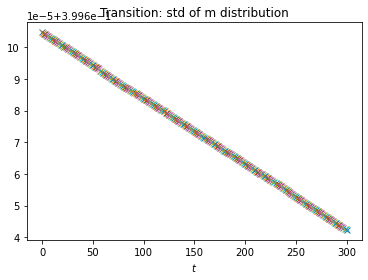

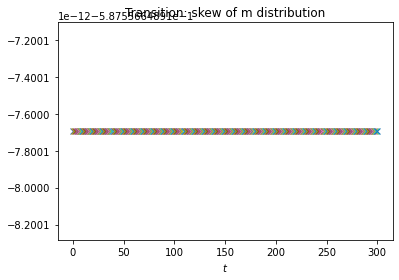

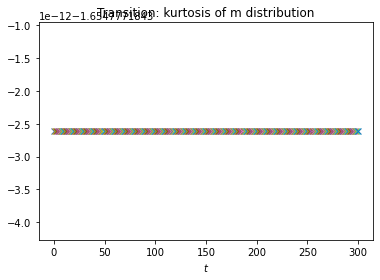

In [111]:
Transition_Distro_Moments('m', results_tran, iter_count)

# Welfare

We calculate the following:

* Initial SME welfare

* Terminal SME welfare

* Transitional path welfare between initial and terminal SMEs

Then we convert these numbers into relative terms. 

This is measured as equivalent CM-consumption variation required to induce agents to stay with the initial SME allocation.

### Initial SME welfare

Initial SME Monte-Carlo sample of money holdings:

In [112]:
msim_init = results_init['distro']['simhistory']['m']

Get object which is interpolant for ex-ante agent's value function $\bar{V}$:

In [113]:
Vbarfit = results_init['valuefit']['Vbar']

Initial SME welfare:

In [114]:
EV_init = (Vbarfit(msim_init)).mean()
print("Initial SME welfare = %6.4f" %EV_init)

Initial SME welfare = 1633915.9720


### Terminal SME welfare

As done in initial SME, now we use the objects from the terminal SME calculation:

In [115]:
msim_term = results_term['distro']['simhistory']['m']
Vbarfit = results_term['valuefit']['Vbar']
EV_term = (Vbarfit(msim_term)).mean()
print("Terminal SME welfare = %6.4f" %EV_term)

Terminal SME welfare = 1630521.7004


### Static welfare gain or loss

In [116]:
def iU(Vbar):
    """Handcoded inverse CM utility function"""
    return (((1.0-mod.SIGMA_CM)*Vbar + 1.0)**(1.0/(1.0-mod.SIGMA_CM)))

In [117]:
def CEV(V_old, V_new, Display=True):
    """Variation in CM consumption (relative to initial SME)
    that is equivalent to change in mean ex-ante
    welfare across heterogeneous agents"""
    # Absolute welfare change
    d = V_new - V_old
    # Percentage CEV - Handcoded version (MAIN.PY)
    Z_old = iU(V_old)
    Z_new = iU(V_new)
    Δ_hand = 400*(Z_old/Z_new - 1.0)
    # Percentage CEV - Auto class version
    mod.C_min = 1e-12
    Δ_auto = 400*(mod.invU_CM(V_new)/mod.invU_CM(V_old)-1.0)
    if Display==True:
        print("Ex-ante Mean Welfare change is %6.2f" %(d))
        print("CEV (hand) is %6.8f percent p.a." %(Δ_hand))
        print("CEV (auto) is %6.8f percent p.a." %(Δ_auto))
    return Δ_hand, Δ_auto, d

So the comparative-static SME welfare difference from moving from the initial SME to the terminal SME is:

In [118]:
Δ_hand, Δ_auto, EV_diff = CEV(EV_init, EV_term)

Ex-ante Mean Welfare change is -3394.27
CEV (hand) is -0.83095426 percent p.a.
CEV (auto) is -0.83095514 percent p.a.


### Transitional welfare

Per-period welfare along transition for $T$ periods:

In [119]:
# Get simulation results for transition
distros = Transition_Distro(results_tran, iter_count)
print("... where T = %i" %len(distros))

... where T = 301


In [120]:
# Get value functions along transition
values = results_tran['value'][0]

In [121]:
# Period where policy changed
t_jump = 1
# Resulting cross sectional distro at t_jump
mt = distros[t_jump]['m']
# Interpolate ex-ante valuation at each m in distro at jump time
eV_jump = values[t_jump]['Vfit'](mt)
# Take the average of these values: 
# Mean total expected welfare - from policy jump until new SME forever
eV_jump = (mod.BETA**t_jump)*eV_jump.mean()
# Calculate welfare difference relative to initial SME
Δ_hV, Δ_aV, vdiff_V = CEV(EV_init, eV_jump, Display=True)

Ex-ante Mean Welfare change is -5352.68
CEV (hand) is -1.31039450 percent p.a.
CEV (auto) is -1.31039584 percent p.a.
